In [ ]:
#  String to Integer (atoi)

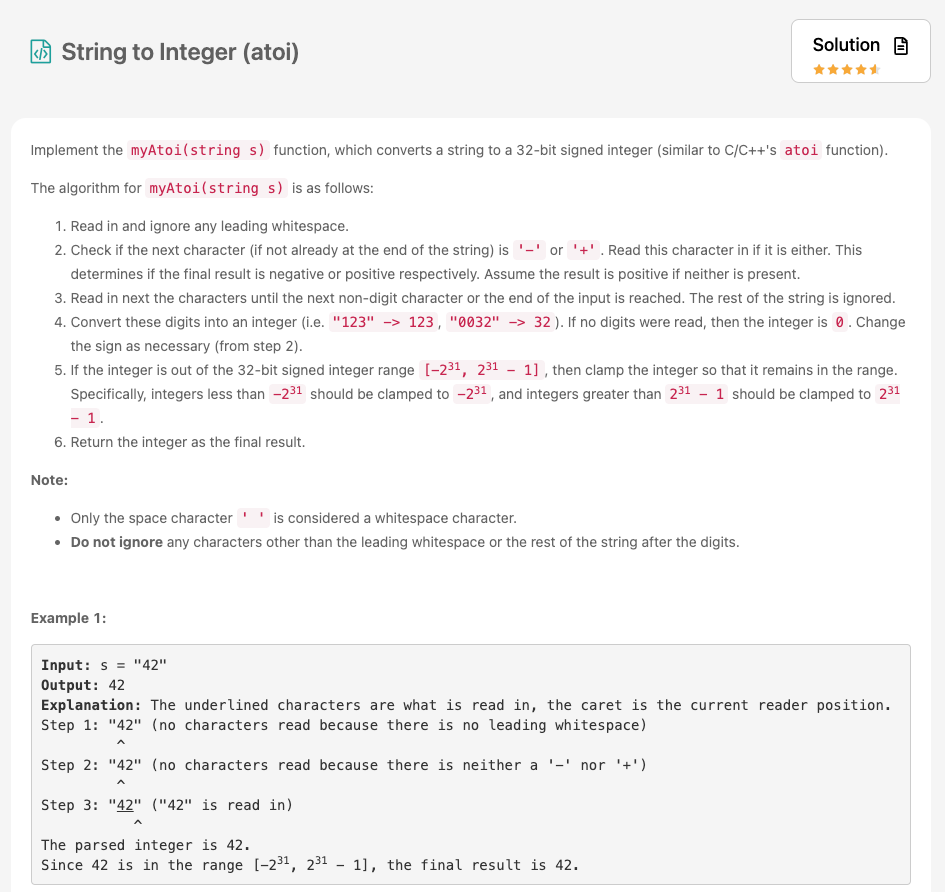

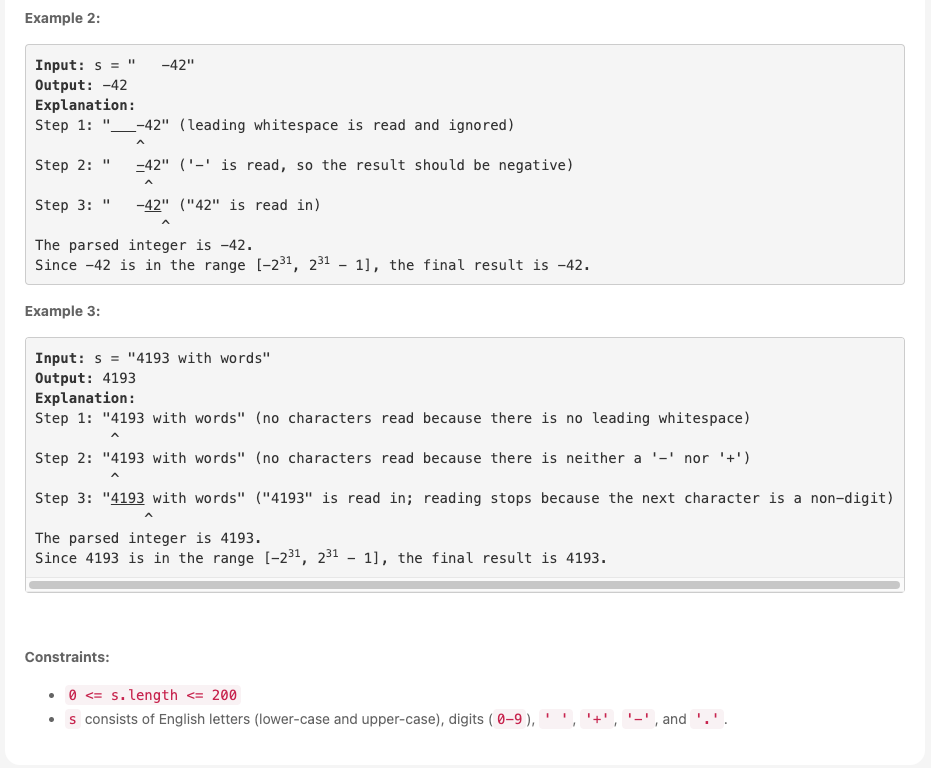

In [ ]:
class Solution:
    def myAtoi(self, input: str) -> int:
        sign = 1 
        result = 0
        index = 0
        n = len(input)
        
        INT_MAX = pow(2,31) - 1 
        INT_MIN = -pow(2,31)
        
        # Discard all spaces from the beginning of the input string.
        while index < n and input[index] == ' ':
            index += 1
        
        # sign = +1, if it's positive number, otherwise sign = -1. 
        if index < n and input[index] == '+':
            sign = 1
            index += 1
        elif index < n and input[index] == '-':
            sign = -1
            index += 1
        
        # Traverse next digits of input and stop if it is not a digit. 
        # End of string is also non-digit character.
        while index < n and input[index].isdigit():
            digit = int(input[index])
            
            # Check overflow and underflow conditions. 
            if ((result > INT_MAX // 10) or (result == INT_MAX // 10 and digit > INT_MAX % 10)):
                # If integer overflowed return 2^31-1, otherwise if underflowed return -2^31.    
                return INT_MAX if sign == 1 else INT_MIN
            
            # Append current digit to the result.
            result = 10 * result + digit
            index += 1
        
        # We have formed a valid number without any overflow/underflow.
        # Return it after multiplying it with its sign.
        return sign * result

In [ ]:
# Valid Palindrome

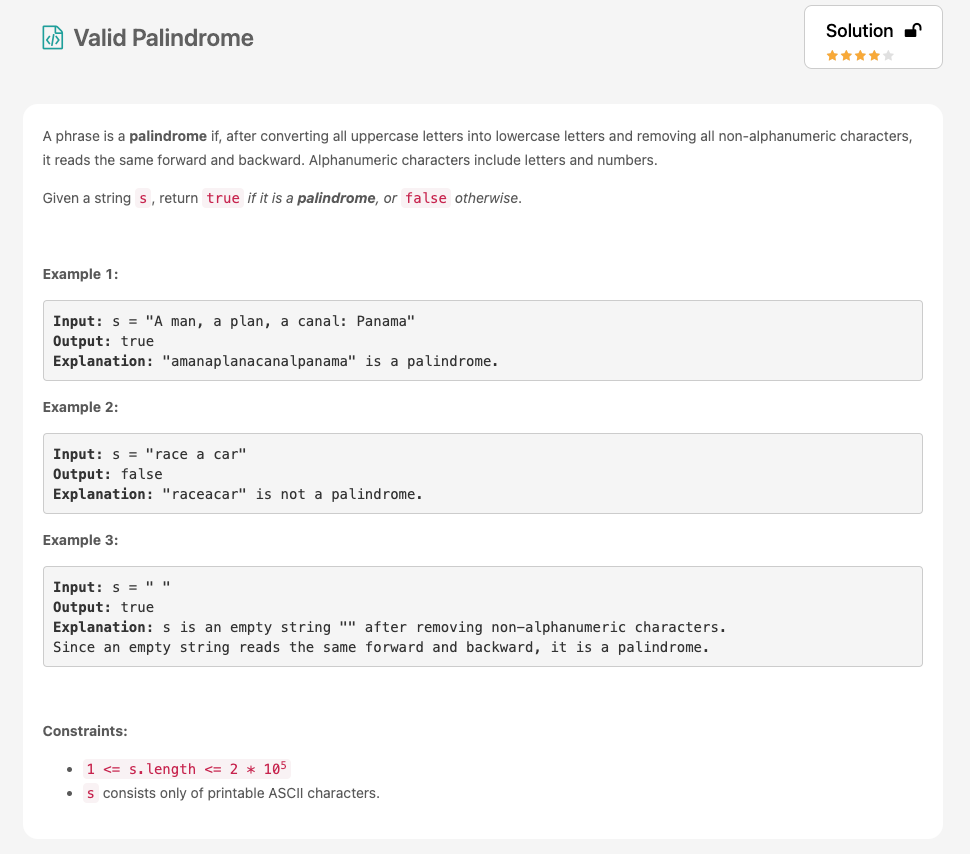

In [1]:
's'.isalpha()

True

In [2]:
':'.isalpha()

False

In [4]:
' '.isalpha()

False

In [5]:
'0'.isalpha()

False

In [ ]:
# Accepted

import collections
class Solution:
    def isPalindrome(self, s: str) -> bool:
        q = collections.deque()
        for x in s:
            if x.isalpha() or x.isdigit():
                q.append(x.lower())
            
        while(q):
            left = q.popleft()
            if q:
                right = q.pop()
                if left != right:
                    # print(1)
                    return False
            
        return True

##### Java
```java
class Solution {
  public boolean isPalindrome(String s) {
    StringBuilder builder = new StringBuilder();

    for (char ch : s.toCharArray()) {
      if (Character.isLetterOrDigit(ch)) {
        builder.append(Character.toLowerCase(ch));
      }
    }

    String filteredString = builder.toString();
    String reversedString = builder.reverse().toString();

    return filteredString.equals(reversedString);
  }

  /** An alternate solution using Java 8 Streams */
  public boolean isPalindromeUsingStreams(String s) {
    StringBuilder builder = new StringBuilder();

    s.chars()
        .filter(c -> Character.isLetterOrDigit(c))
        .mapToObj(c -> Character.toLowerCase((char) c))
        .forEach(builder::append);

    return builder.toString().equals(builder.reverse().toString());
  }
}

```

In [ ]:
# Reverse Words in a String II

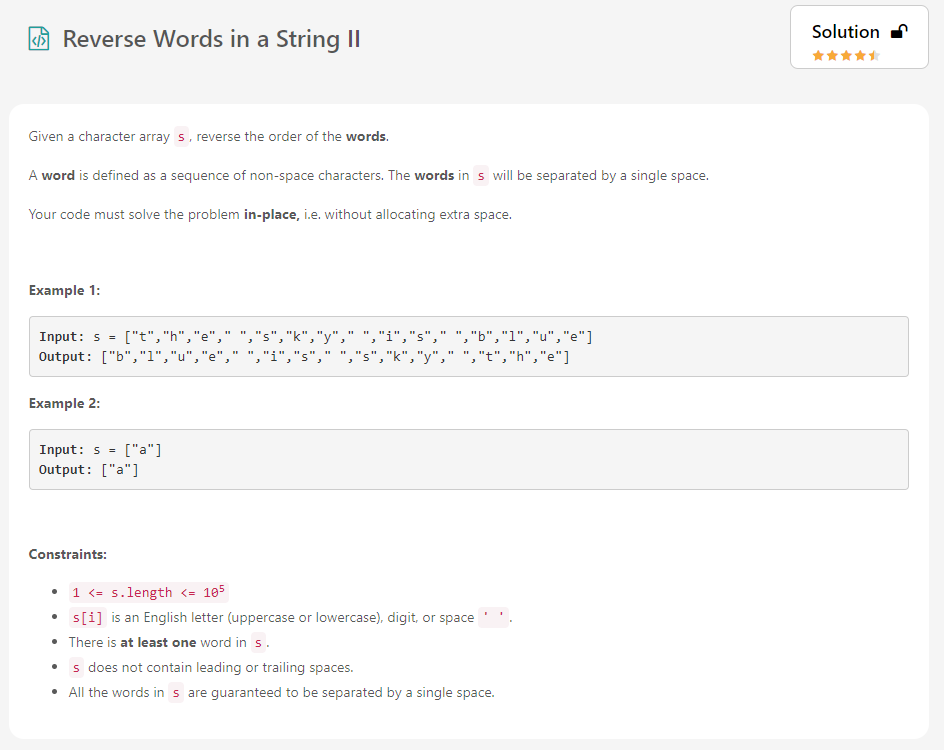

In [ ]:
# Out of place
import collections
class Solution:
    def reverseWords(self, s: List[str]) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        start_end_list = collections.deque()
        start=-1
        for i,x in enumerate(s):
            if x!=" " and start==-1:
                start = i
            elif x==" ":
                start_end_list.append((start,i-1))
                start=-1
                
        start_end_list.append((start, len(s)-1))
        
        print(start_end_list)
        
        new_result = []
        while start_end_list:
            start,end = start_end_list.pop()
            print(start, end)
            for i in range(start,end+1):
                print()
                new_result.append(s[i])
            
            new_result.append(' ')
            
        return new_result
        
        
        
                

In [ ]:
# Inplace
import collections
class Solution:
    
    
    def reverseWords(self, s: List[str]) -> None:
        """
        Do not return anything, modify s in-place instead.
        """

        
        def swap(start,end):
            while(start<end):
                tmp = s[start]
                s[start] = s[end]
                s[end] = tmp
                start+=1
                end-=1

            
        start = 0
        end = len(s)-1
        swap(start,end) 
            
            
        start_end_list = collections.deque()
        start=-1
        for i,x in enumerate(s):
            if x!=" " and start==-1:
                start = i
            elif x==" ":
                start_end_list.append((start,i-1))
                start=-1
                
        start_end_list.append((start, len(s)-1))
        
        
        for x in start_end_list:
            swap(x[0],x[1]) 


In [ ]:
# Standard Solution
class Solution:
    def reverse(self, l: list, left: int, right: int) -> None:
        while left < right:
            l[left], l[right] = l[right], l[left]
            left, right = left + 1, right - 1
            
    def reverse_each_word(self, l: list) -> None:
        n = len(l)
        start = end = 0
        
        while start < n:
            # go to the end of the word
            while end < n and l[end] != ' ':
                end += 1
            # reverse the word
            self.reverse(l, start, end - 1)
            # move to the next word
            start = end + 1
            end += 1
            
    def reverseWords(self, s: List[str]) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        # reverse the whole string
        self.reverse(s, 0, len(s) - 1)
        
        # reverse each word
        self.reverse_each_word(s)

In [ ]:
# Longest Palindromic Substring


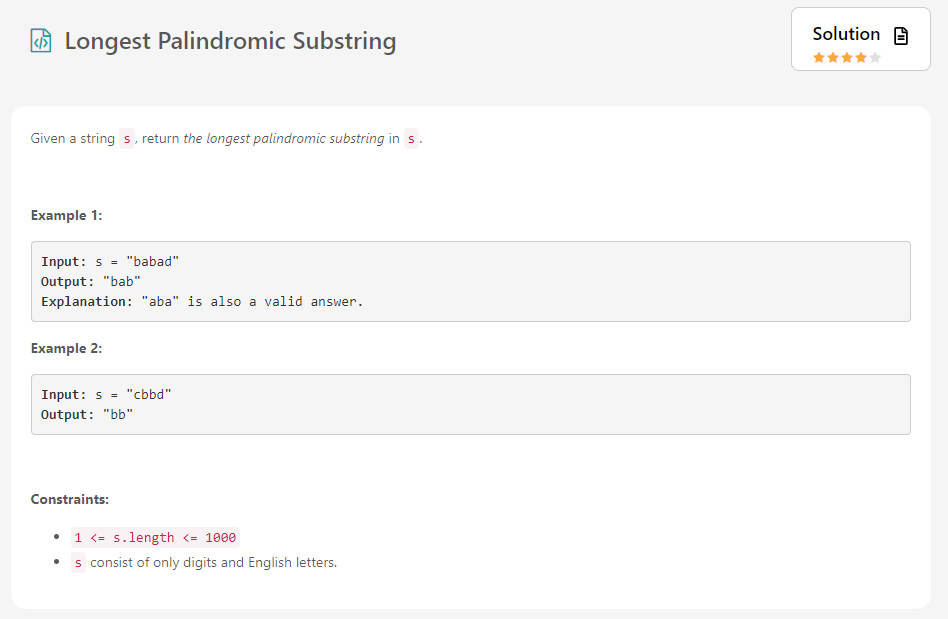

In [ ]:
# Accepted with Situaton Odd and Even
class Solution:
    def longestPalindrome(self, s: str) -> str:
        def check_hub(n):
            pair_list = []
            i=0
            while(i+n-1<len(s)):
                if s[i]==s[i+n-1]:
                    pair_list.append((i,i+n-1))
                i+=1
            return pair_list
        
        def extending(pair):
            start = pair[0]-1
            end = pair[1] + 1
            
            if start>=0 and end<len(s):
                if s[start]==s[end]:
                    return (start,end)
                else:
                    return False
            else:
                return False
            
            
        even_pair = check_hub(2)
        odd_pair = check_hub(1)
    
        # print(even_pair)
        # print(odd_pair)
         
        max_even = ''
        tmp_pair = []
        while(even_pair):
            cur = even_pair.pop()
            extended = extending(cur)
            if extended:
                tmp_pair.append(extended)
            if not (even_pair):
                if not tmp_pair:
                    max_even = cur
                    break
                else:
                    even_pair = tmp_pair
                    tmp_pair = []
                    
        # print(max_even)
        
        max_odd = ''
        tmp_pair = []
        while(odd_pair):
            cur = odd_pair.pop()
            extended = extending(cur)
            if extended:
                tmp_pair.append(extended)
            if not (odd_pair):
                # print('tata:',tmp_pair)
                # print('cur:',cur)
                if not tmp_pair:
                    max_odd = cur
                    break
                else:
                    odd_pair = tmp_pair
                    tmp_pair = []
                    
        # print(max_odd)
        
        if max_even:
            max_even = s[max_even[0]:max_even[1]+1] 
        
        if max_odd:
            max_odd = s[max_odd[0]:max_odd[1]+1] 
        
        if len(max_even)>len(max_odd):
            return max_even
        else:
            return max_odd
        
        
  

### Standard Solution
### Approach 4: Expand Around Center

```java
public String longestPalindrome(String s) {
    if (s == null || s.length() < 1) return "";
    int start = 0, end = 0;
    for (int i = 0; i < s.length(); i++) {
        int len1 = expandAroundCenter(s, i, i);
        int len2 = expandAroundCenter(s, i, i + 1);
        int len = Math.max(len1, len2);
        if (len > end - start) {
            start = i - (len - 1) / 2;
            end = i + len / 2;
        }
    }
    return s.substring(start, end + 1);
}

private int expandAroundCenter(String s, int left, int right) {
    int L = left, R = right;
    while (L >= 0 && R < s.length() && s.charAt(L) == s.charAt(R)) {
        L--;
        R++;
    }
    return R - L - 1;
}

```


In [7]:
# Trapping Rain Water
"""
https://leetcode.com/explore/interview/card/microsoft/30/array-and-strings/211/
"""

'\nhttps://leetcode.com/explore/interview/card/microsoft/30/array-and-strings/211/\n'

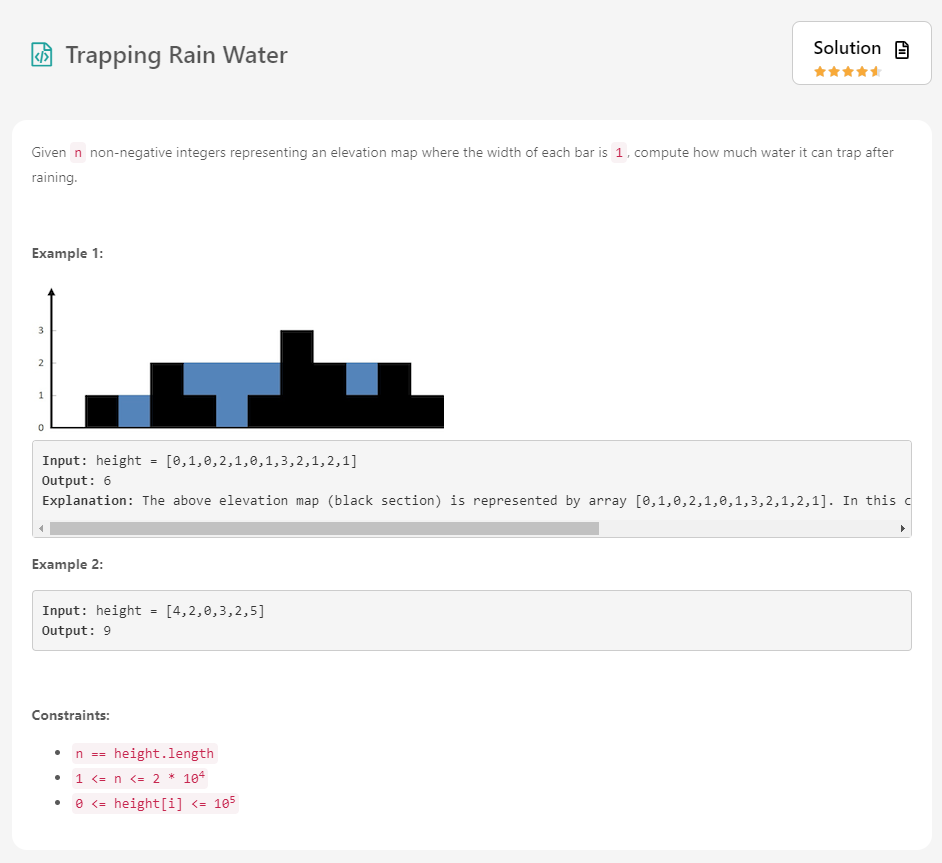

In [ ]:
# Time Exceeded v1
import collections

class Solution:
    def trap(self, height: List[int]) -> int:
        
        
        agg = 0
        
        # Parse layer
        level = 0
        max_level = max(height)
        while(level<=max_level):
            level+=1
            q = collections.deque()
            for i,x in enumerate(height):
                if x>=level:
                    q.append(i)
                    if len(q)==2:
                        added = q[1]-q[0]-1
                        # print(added)
                        agg += added  
                        q.popleft() 
        return agg

In [6]:
a = [10527,740,9013,1300,29680,4898,13993,15213,18182,24254,3966,24378,11522,9190,6389,32067,21464,7115,7760,3925,31608,16047,20117,239,14254,3647,11664,27710,2374,23076,5655,9035,4725,13013,12690,22900,27252,32431,2234,281,21614,25927,4512,12695,23964,1279,24305,10618,9903,9943,21625,16622,23662,25734,1255,24695,9120,29898,7376,20450,31788,4604,32502,29052,24447,12007,30153,15745,7726,28122,7726,4567,16604,3580,28544,10748,28767,17120,1236,21310,10526,10841,2946,12586,15805,21648,31457,9798,27901,4691,31057,13571,3805,32176,4735,27885,7430,28867,8932,14373,6757,24268,7311,7441,7706,17284,2341,18514,1425,7346,27942,29430,4590,8697,28785,30959,29871,12020,28683,13252,3980,4997,23836,28039,27554,15977,3386,7,11217,30224,24554,29766,32355,5036,23908,13870,20974,29833,12951,12415,20859,5532,11885,25868,27623,3422,9296,21799,27274,22491,22509,20058,23319,10501,22072,28504,20675,14671,24496,31026,16554,16503,18404,16590,32110,4771,28214,21654,5665,5040,13279,10861,7269,29895,4915,27111,5585,28721,15398,9913,7319,30572,23056,8046,29540,1918,26285,21596,4232,6025,11880,2775,25687,21920,27097,4260,24271,9689,4236,21424,30843,6051,18692,8706,17046,17754,6655,9711,17012,21017,16636,29325,7198,31184,20987,13418,20541,26518,1156,23165,4409,17984,20970,19292,29601,16178,18641,31408,32206,23413,14830,29414,23235,31498,8718,10024,13400,22142,30042,8588,30872,16063,12249,24971,3687,3886,20278,32436,15720,1525,6596,25505,19741,30363,22207,13611,8016,2774,23509,14810,18866,1440,5092,21919,29379,15500,25350,28102,30193,15195,3019,18726,4868,17866,31173,16539,11449,11183,5450,21430,23213,9028,1141,30130,21117,7619,32110,9898,27692,18995,3563,11530,17861,14977,31735,836,19009,24274,9203,19908,8106,19224,30682,27941,16513,31459,969,165,17502,1915,7102,27862,7126,1067,5791,14999,17313,29919,14975,25155,13052,4850,15902,22312,2381,21569,942,26427,16134,26756,28893,17161,24011,8414,2063,16881,983,30130,9963,13969,13980,7865,3610,26494,18601,29009,5707,56,22225,31000,13947,3677,8330,32442,16243,24348,16275,28935,28818,20717,730,25673,18892,28031,28828,7124,16115,24562,13262,20958,12341,6983,30908,12689,19431,17685,31984,14175,15745,14461,22101,27542,19945,13663,13724,11060,22772,4046,10207,29436,15402,29634,7044,24777,8905,4365,11365,24355,21261,17297,31533,12048,24751,2991,5125,17452,26795,27395,10353,9980,14919,31054,8308,20864,4433,17843,18171,14855,17832,22567,5497,71,5118,26403,25294,28845,25563,5531,31085,20978,12005,19764,22718,12527,28000,2226,9665,7858,11249,8879,3829,5329,11943,31891,10104,29694,17723,4544,32111,20700,13463,19213,28584,786,22934,9846,1662,10909,26891,1810,21501,8042,28932,16709,8007,32548,32592,14134,24374,19787,4414,6531,18499,22918,12456,8244,29095,24634,25136,20462,21952,6491,18634,8041,12725,10626,8827,4388,2141,10560,608,5464,19549,14003,27633,18474,30097,17750,13191,24612,1454,8221,18460,24806,16421,20930,19026,26137,6474,26457,5303,6821,8373,16683,6472,12324,27368,26049,14388,27286,15923,2879,29666,5206,1749,19188,9780,28237,22116,13102,6926,28773,29295,11091,13330,28224,13921,24109,31150,29739,19624,7814,15705,28749,791,31221,12569,31780,16009,28151,6217,23091,20936,29505,30105,31732,15277,21333,23126,9236,4232,31828,15084,30943,4801,18195,27817,6906,16064,25456,12483,5200,19979,24295,28829,13134,30126,31072,3910,9811,25568,15435,29762,27490,16611,2031,13198,26651,14124,2815,30430,15849,18116,22639,3113,11900,26606,3973,15719,9338,16650,18995,21914,13425,29625,17828,30475,10769,17730,30997,9942,30104,9781,3814,12712,3469,23886,29681,19912,6321,22939,28954,7764,29747,28641,807,31694,27171,1853,25811,9687,11305,30983,32541,16953,26231,10235,13286,19755,32508,4763,14011,24273,21722,25807,26608,27139,5147,19663,26094,22607,29087,5954,18637,10049,25433,22184,15398,27361,10428,6645,27426,22910,14191,30334,29399,17578,24648,26905,20181,9094,16504,21120,29691,4672,21251,4855,3472,27353,13940,2351,4239,23340,31438,30825,6465,7212,3013,6622,18193,11885,2862,23903,2717,16358,12213,7481,6665,7925,31694,18779,32664,24227,24814,19899,30333,4138,8954,14325,2542,13748,4096,24629,10875,21094,24613,6488,11678,15261,20958,11342,27539,3959,22115,8899,28521,29846,25185,9470,27994,1824,14063,28425,29528,5898,14020,8466,2024,7063,7079,28433,11059,27,8230,29611,28250,11781,29067,10838,5387,30748,32268,21695,30034,19209,29506,20329,2481,18198,221,6550,26994,10037,13205,5226,6972,6468,31844,15694,30181,27535,14322,26515,903,13207,19025,14679,6870,21010,8938,28589,8880,30770,15543,11768,13302,4650,28339,23704,3483,15087,8335,23241,3834,7483,14247,1991,11373,26072,20532,26423,4635,11035,5827,25794,26897,28079,21990,31491,29333,5779,3113,16803,28086,5734,7751,9922,31528,2531,31134,22425,29519,1960,15073,7262,25242,31547,11533,11112,8210,12622,13470,14228,12851,31042,31490,15847,30202,32747,28238,22133,15423,18323,26928,3201,20805,24897,5924,485,8848,19259,26859,25013,30454,6345,11578,26143,27897,18236,8623,30101,13140,25647,4104,6959,12244,26893,19351,24138,2153,28627,8945,15734,17021,9495,6631,20623,27780,6986,32695,22057,1493,25402,13699,12337,6328,3546,14593,5074,15040,31558,18293,28822,26459,6914,11484,21198,26791,386,4970,17715,17031,30448,26423,30157,21495,25385,8758,8724,8860,15113,5222,3670,1183,21224,31820,3160,7356,14948,928,21824,23702,1377,29767,15026,334,9807,14721,29498,15955,15788,356,1514,2684,713,4745,6468,17236,10704,10757,10586,6837,27398,30106,26931,664,3918,32303,21361,2859,9711,5758,11825,26404,18326,8717,1587,2645,2719,18527,25915,5761,3216,26731,18358,2671,13542,24653,5537,26428,5397,32060,8871,16373,2506,10172,31113,26470,371,8212,30403,12332,3073,24323,30317,29458,6124,28335,6495,20378,120,20446,26008,23257,20792,16232,17889,12424,25296,28653,11437,6745,13566,3011,24132,16775,10716,4914,9760,7857,1631,27364,31639,7144,23588,11927,22971,7431,16492,7189,20095,25154,29797,10854,1307,30978,25259,8516,20401,12017,5646,17615,29744,15184,3478,27010,16505,4753,4548,1126,10688,6178,28443,2949,31541,8839,14815,15010,22500,1451,32541,4135,5082,6008,1771,5727,10378,25253,3057,19685,18543,31695,3112,18013,22002,11468,5858,20065,16781,27196,15371,11198,4913,18272,174,21217,8933,23600,31930,7308,17585,20903,1543,21710,27578,2146,3220,13873,2222,3433,3091,9525,10082,20813,13991,16381,4026,21875,15596,5705,28106,17327,22328,7588,17722,9236,29728,13791,13295,9483,12350,20925,18407,10659,31538,6128,27749,4648,3559,4164,12879,29431,5656,12571,30676,11664,15122,24857,13137,8173,24507,16672,25974,24083,17875,21119,30373,10726,30330,19814,922,7489,5106,15262,23889,14918,30887,11126,16420,22003,18284,3841,1589,4342,20744,7038,22795,21187,29425,15640,9856,31459,21335,29392,23770,15503,7780,9911,12856,22653,10435,22112,31536,10490,7007,8085,21686,13369,3181,1353,9535,14571,10668,206,14631,26895,22507,13128,32336,18188,27597,19298,8973,22781,24521,29503,7230,9804,11124,23220,22204,13186,8195,12724,6135,28765,28171,9995,20957,19492,14476,16207,28158,25655,22830,6164,21486,234,14794,27488,12011,21651,26412,26463,14016,12514,16664,11863,32745,9841,27530,4829,5880,17052,25922,25674,27448,24467,26496,24425,19599,15021,29453,6002,169,17664,11898,27452,13138,25134,31148,23214,17956,2433,23193,20599,17251,32059,10060,13310,30757,3111,4399,22428,31158,4468,30089,5898,6714,9923,5958,14869,4244,15487,9719,28569,22407,3181,13849,29868,2075,6788,3738,15386,13123,14334,28569,10770,32444,15535,13934,14366,2360,27286,746,5464,22972,12210,16863,5852,24135,14870,16611,3193,15796,4672,12114,19884,225,12199,12434,4814,22289,15251,25499,28300,31119,30257,950,31640,29333,29159,1668,4766,19307,6373,23363,7290,26067,12541,12109,21672,1189,20916,23521,4091,18359,153,24870,23442,7935,26581,4717,2057,30972,23300,22455,29932,12369,7747,10359,12401,31924,9098,9113,16230,27398,12861,26818,8552,8387,11517,5850,25942,28317,27076,5064,25093,30308,20529,380,26421,26665,12832,1075,31428,6819,4734,15862,30242,722,20060,9060,6149,20193,23617,3506,24158,10321,5573,11760,15499,24916,16219,17806,462,4471,17007,18462,1022,25988,19889,19035,25212,9895,20400,25195,30057,15567,32682,23905,15638,12375,26786,28166,26044,28390,10932,14553,13166,22420,26278,24916,27211,21070,1983,31857,1784,30331,24540,3181,23374,1247,18880,27084,25423,14528,17836,15773,26207,13384,17455,28927,14513,3115,4928,13796,12543,13962,8586,3349,9854,24854,3079,28023,2833,29304,10704,28812,30140,15089,2612,10300,12636,6205,6407,470,9110,4286,23868,23122,8206,10710,1463,10201,31705,32149,14428,23687,30004,21396,22380,26223,17270,16672,12561,28895,25411,5275,19767,19174,29443,4128,19870,5908,13202,14182,5165,10369,313,13543,9098,12560,22750,6721,28135,9461,15735,32732,1567,30581,4549,18381,26369,5357,14910,2042,17643,15894,6987,24447,7580,10375,18355,15185,31299,2172,29527,20001,6107,26581,32289,16260,27067,28258,11063,22096,10857,32605,22644,8777,28336,20536,18968,26877,28402,23706,24254,23020,31423,23460,16271,19948,19109,6776,24758,5580,9290,24572,26131,7224,1209,15835,16436,24284,17658,29389,5505,717,27877,16921,19382,2084,10295,25688,17815,24812,4582,30075,10463,28478,18866,1039,16505,11946,2045,9664,20210,3289,9180,13596,25903,13681,16238,7322,4443,21817,3693,21211,31268,6270,27394,27695,14887,26805,11486,25947,4008,11617,30342,2970,13447,5175,27886,9697,29295,9344,3402,17255,18257,8640,5409,21349,11793,405,12451,27162,24447,30945,25404,22291,8072,25643,24169,28841,27310,3907,15051,14539,6069,8229,18298,16126,16799,10528,25499,25505,3547,9784,5685,24694,8890,27080,22592,14942,25122,15468,17663,100,15494,13341,9360,31741,12309,1694,1218,13966,18482,23320,21542,30767,12581,24321,13161,9135,13328,8769,28896,5080,12068,32408,25189,24052,24084,3642,4450,7568,1738,30141,27947,11647,24154,1333,30609,29218,14900,29854,8116,6375,24989,16250,16152,28944,4960,25530,27899,16822,5056,2018,7142,16653,22194,19561,13699,4329,6729,19550,10414,25729,1394,4434,7630,13171,7905,32369,17766,7689,12363,30450,29927,26299,27094,17330,1481,9461,22990,31771,10969,5402,3225,30283,12245,10696,26861,626,22326,16990,7232,30076,19021,10939,11136,18161,20369,18505,31749,17945,15160,6203,26820,10851,19972,25362,14277,775,30304,18790,983,18923,10155,3555,28290,7620,15316,16530,11837,26493,4903,12121,19681,28380,26214,16326,10846,8803,32540,5640,6060,5748,18990,11582,7685,32697,30899,17653,18002,11459,8965,18411,29923,17137,8728,4121,11618,17044,4875,11249,21258,5712,14589,2277,14612,12742,12578,10024,6002,879,11542,15032,14272,15819,10097,23964,28280,15292,18075,14186,13413,1068,25058,15885,29786,12534,23753,29637,24867,15620,19619,18031,26556,32181,7265,29703,4545,19329,8873,6251,27686,7647,24104,18530,17960,7782,19496,24028,23683,30515,3429,22908,17638,24716,19740,32083,11684,12738,7782,1263,17836,31068,17348,7828,24763,24689,5371,2505,11216,23894,30498,32534,1505,31098,6905,17677,20684,11917,30076,5767,20112,7912,9912,15920,24253,11561,17118,2886,12329,14109,12694,925,15077,30692,6037,30439,5743,21839,32370,22322,41,7309,11957,31410,9738,29191,28722,10945,2452,30856,9365,9252,3846,29601,28733,27792,3282,26956,25934,8556,28497,1743,25857,9177,17590,19683,11071,17904,17729,18198,14447,23882,11189,21102,3468,24262,29195,14159,28282,26502,18024,6814,7834,22331,19533,2599,19356,24483,32269,10300,6804,11600,17029,15007,2896,3498,2823,8355,9705,13879,3479,29837,9881,4378,28506,23616,7116,13018,29515,19738,10874,23909,304,18201,27827,13397,6349,19266,7804,1649,1367,4419,3289,20599,25899,16471,31531,23833,22976,12138,29372,9797,29658,28798,12441,23465,12289,11085,9632,12919,5938,2863,15577,25189,22484,17471,23562,29689,27373,29625,21125,17411,6550,24487,10821,24683,30381,22973,3897,8748,8393,18817,16608,10401,24691,8623,16918,6656,30355,17627,15150,19748,12072,7512,16960,16527,3132,27737,32196,687,7448,5206,21856,28512,21940,25265,9471,26291,31345,7322,9763,24813,29706,21296,892,979,8136,17128,19129,7461,28662,16947,12446,9833,28821,859,23383,13801,1105,11694,9996,255,28083,4575,6325,21392,30871,32169,29488,8407,22497,29365,8848,4452,2924,17598,29113,12900,25155,25331,15914,10786,27924,20637,7705,5582,29921,4353,11461,29822,18937,2696,28936,17266,32551,9501,4651,12188,25897,10199,20223,95,23139,6616,27433,8088,17109,10869,1726,25307,15435,25751,5136,31231,25299,12640,24519,9948,14708,28178,24371,8787,2845,6445,14560,21135,22492,23256,15211,13963,8784,27778,13973,10964,12641,9161,27286,27537,6702,9371,436,30656,9799,32411,18451,14786,27165,14790,5583,6426,8119,5718,8008,22898,6566,998,8125,27358,25146,5080,4637,3941,23286,27380,27673,31166,28738,30289,3966,18775,13664,26489,26050,1948,31905,15304,23004,2677,16345,21269,9305,24592,27920,22933,7597,10210,27514,2299,2759,31976,27818,1252,6120,21811,24066,22131,30132,31395,3694,19256,19594,243,23634,15191,31249,23797,32704,31462,19731,287,17647,31382,13199,9031,19176,23446,3849,4011,6787,31412,8997,11572,10642,14022,21108,5884,7772,30280,7566,28429,26445,12358,6241,20076,31467,31869,18888,30294,21516,28349,10592,9929,32326,16785,12183,15942,18088,5154,11269,1750,25767,16217,22016,21579,12123,1604,19306,22472,13036,9659,29134,19587,14919,1859,28075,25034,8469,6962,9232,1604,493,7700,31337,30842,5320,19790,18585,16533,20918,20225,12617,30569,11216,20785,21631,32435,30830,9255,4210,3743,22170,21523,17565,15502,10948,1526,19218,24341,695,7103,7185,29513,30155,25524,20441,26426,21852,22292,29374,28093,16764,11259,24444,16239,30181,16005,5067,27894,25393,5430,13107,9866,26702,1178,11298,7349,16428,13864,13116,24150,30648,5740,2290,22508,14,28262,15702,22545,12522,11309,26157,15685,20320,7895,31558,12525,27854,10653,19723,5019,12814,12859,18774,32400,27376,20118,646,32384,26087,30113,11473,27541,31746,14209,1500,694,21790,16624,23176,9224,15451,11743,7951,23221,6348,28511,19793,4589,24179,18625,32104,6955,2924,10236,27778,27066,1384,23888,26096,10103,27485,30249,17018,1752,12156,16198,29174,30253,3428,12826,17177,6182,12437,20851,23948,9622,7975,14681,8770,7286,15548,26169,26122,24621,31155,30531,14944,12047,670,28688,14473,4387,1014,15752,735,9257,22030,515,28777,26843,9542,27822,5806,30068,27265,8241,9675,12655,18393,27790,19140,32401,7569,24652,3096,29481,27466,29910,21656,2455,20858,23070,8312,26891,18203,9605,167,11151,22432,26623,26716,17736,32045,28530,30962,28920,27399,14176,16373,17864,23626,19654,7037,23109,15066,10564,14522,6312,12955,18813,24785,10330,1253,705,2022,4279,12338,23530,21114,30995,16410,28035,1272,10746,22914,3376,4490,13244,22288,18505,14385,24105,2530,29129,27925,17818,29311,18279,31002,18737,1549,29186,2227,11873,21445,25922,7419,7600,7845,25213,4866,23739,16228,8919,13668,27003,25259,27822,3105,23240,30594,6197,24232,10779,25097,18270,7221,19096,18024,21758,7773,12620,8,16172,31208,12979,6404,4329,20958,22909,21978,3847,24804,6801,10599,11331,11465,2643,9490,2229,6237,30498,14663,106,18306,3365,23079,3407,2437,26440,23677,80,15790,12673,7924,21954,26133,16472,21384,10494,23736,16806,32059,2895,24267,27293,30217,16911,25167,18184,4381,12300,27110,3540,11589,28209,19174,7888,19364,22370,6572,3505,32423,2983,12339,24153,17722,11917,741,22105,9787,25801,14256,1972,8238,21791,13149,30950,16691,12418,4381,3620,31542,1405,14437,6118,2150,25297,1276,10915,29672,3424,13651,9179,6860,19785,4884,91,14656,5717,2557,26557,22531,3986,8431,4398,11805,15933,2370,25972,19150,22501,14428,559,7108,32718,16258,606,9104,29588,21997,12326,29787,27408,18721,975,17109,12159,18298,5136,9583,11745,14600,23436,21450,2208,6813,30620,31343,27762,3875,17487,30400,11392,6963,31151,3887,27080,16100,11846,31661,18880,25057,25313,21093,60,17855,31636,11435,12433,29325,18942,6191,27131,20908,3278,10359,17212,27361,2182,15500,22918,30632,7552,19699,13979,16587,32558,21982,25139,31284,28837,12708,8862,4351,10845,30575,12458,8148,19762,12852,25287,32116,1711,1001,4969,6545,19084,2290,18094,7139,17781,4060,21313,31096,27918,31053,4734,29772,20787,21563,23511,14617,4740,2653,20342,3952,8737,12511,13347,20489,11954,20826,27753,5464,25259,16131,18164,23136,22478,19491,11838,31692,25585,29639,31595,20284,8961,19384,28785,17629,25159,21165,7547,18236,20714,28352,13712,19804,6581,12319,5743,21254,18971,11268,1982,11104,10872,999,30052,25025,27546,27890,10548,7364,19840,19381,18379,14235,9057,14363,5307,1446,22769,32156,16873,29764,23775,27573,20019,32490,5282,2709,14166,10610,15733,2074,783,29877,24224,28923,25473,347,12538,2631,31447,21746,8108,24334,554,30014,17975,22109,22437,19920,4025,25968,14311,5082,23404,12836,9896,7234,19055,14763,19104,22517,6857,20355,16548,27262,13227,2217,10771,3799,18165,26378,31344,15999,11260,22842,18512,20172,22410,25192,9591,30851,5415,32402,16958,32166,26007,5877,24632,24973,9892,6856,22548,26424,26654,4137,14021,18916,4639,12632,13793,25564,16531,27171,4935,14226,30712,18849,3077,3822,5987,15395,32377,9446,11204,8552,30646,3407,2154,4880,12328,20211,18634,28499,15228,25571,8060,31731,28602,5135,5766,13679,18356,24083,9437,7802,17572,25172,15657,9131,4881,1100,14793,26486,30450,13858,18967,2651,17174,8830,17645,17245,24515,10395,1128,23734,9374,24222,12011,26825,2506,3622,4455,17240,29780,24356,28378,13047,8655,9453,26902,16065,30523,397,26308,3145,14124,21342,6824,22996,25384,8410,4135,26821,19536,30382,24838,27736,5954,27663,30836,20627,14143,16721,1867,28026,9353,19638,3475,31363,21007,10628,7496,22089,9804,23898,14940,30340,31597,26563,31744,5177,27314,28684,21280,26670,26390,1363,6700,2977,27442,9441,21022,20793,15967,31418,12473,10813,5403,4209,25614,27652,4270,24129,12101,2477,25101,29274,17562,5648,5118,8825,166,8691,16509,31675,27360,19074,13662,25779,8035,3065,19509,9658,1522,11428,31091,19334,31289,21513,22225,6143,18773,8804,11506,30029,10391,23635,16451,7990,2437,32467,25895,30375,28450,20331,8017,13200,10352,15527,20592,26869,5170,8904,14866,3907,20982,18618,22210,2272,1107,10566,20084,21765,2160,23689,2596,25808,18117,13733,10937,18069,294,26806,26415,7030,16893,19720,5621,2867,20695,3975,26004,10819,20514,26998,2194,1571,26676,12132,22678,19438,9104,19548,13516,15662,24677,32093,8075,26353,31576,24841,24374,20256,6019,12193,9824,3085,10174,12081,1843,31307,7453,14344,13842,1218,24250,23915,24445,13058,28340,3723,5429,29144,24695,17332,5793,18975,1086,3014,30833,31193,27607,3561,28545,9087,11430,21373,17152,1941,749,28240,10705,31872,14923,20244,5937,6300,32642,24592,15003,17034,32637,14357,14056,7111,30609,31156,21691,31107,6915,12974,13340,24496,29130,20396,16739,12889,5271,30768,29016,4405,27155,26316,2200,4476,18791,4498,29243,18937,9730,14027,27059,25953,10390,8684,31735,12003,22884,15557,9186,19712,16314,16636,1493,7837,6842,7610,3748,28246,5980,26020,31152,28694,10167,22797,592,15588,24444,24681,17526,16640,31171,2821,4239,20527,27658,26102,13994,21587,10874,16208,3293,19006,365,10648,13540,200,10286,21371,25868,19999,28927,1983,14416,12127,14945,27003,18881,1635,1423,16515,7979,27098,22092,27175,9973,15261,16350,16925,19785,31040,17243,6075,27765,31462,25379,873,7313,5210,4014,12375,9826,19548,20872,28267,7551,7737,21657,8318,26034,31135,14506,23239,10145,29870,19237,17815,30894,25682,3612,6215,14875,20177,12429,16495,29554,27808,23525,2393,11300,11131,31426,22454,2160,26548,23805,19855,11654,20428,23784,27262,12525,9792,27092,31773,5922,21925,7127,29375,9602,2807,13516,28254,2921,18991,12954,6101,9884,12563,22202,6735,26340,23634,18163,20736,5372,8912,11112,32019,173,6975,28117,6115,23096,8175,32278,5485,15092,17639,16361,11014,8504,29748,1524,28233,25467,9345,15882,24660,24250,24040,12970,14644,25627,264,1480,1949,10703,1112,18640,30942,17212,7098,21993,23829,25692,32340,20087,15263,29792,16027,25315,3027,13210,26800,18334,26096,30873,23280,31587,16467,18582,3271,17085,3310,20239,14276,31946,19189,30897,5875,13630,24794,13691,12391,6058,21116,9761,23830,10239,10140,14510,746,25678,5776,30830,13588,13265,18235,5387,11940,18223,16956,25846,23382,19964,24678,26376,25263,9599,20080,1898,26953,25785,30958,11186,31852,27042,29824,19022,23517,19382,13898,4390,5627,22448,12452,24445,10759,30870,10258,5912,9412,12789,21622,2211,27456,3950,8836,32592,10225,11633,10615,12225,3587,16201,10498,3624,26353,13913,9098,20397,7763,28325,26770,6928,16375,1172,9079,11407,7218,14324,16989,28938,1656,62,18793,23653,25131,13851,26161,32558,29105,30248,22384,8063,7113,8438,31999,22822,6943,7254,9216,2308,19486,14803,25436,1971,3333,26239,7281,30572,25661,2035,29700,10535,24810,10897,22397,23811,27072,25868,25171,25065,28183,5419,14277,22636,11586,22985,9419,7412,2077,28193,7756,7452,4326,19016,28561,7256,19790,11515,11514,11227,24271,29339,16111,22968,1343,23926,6426,23367,12198,13128,29139,14026,3917,21506,3548,12368,24855,11721,29775,32218,24852,12866,7892,1725,7252,12557,31255,12871,5369,15247,19066,2469,27792,30197,18695,12548,2210,31093,3240,31735,25989,11223,5018,8473,2936,12341,287,20723,23024,21759,25459,13344,7468,9025,5634,5294,8719,29481,5080,14024,15407,10692,20057,9362,29226,1032,23602,29013,17465,4887,5263,14300,16647,19906,27279,22558,23747,23372,7412,14365,15987,31601,3616,3085,30604,12199,22589,27065,22976,2468,29115,11043,24344,17184,30207,25706,22594,732,26201,28913,21804,29411,30519,23486,31698,3088,15769,10016,16724,15056,20677,14229,14667,16681,13372,26090,28509,31228,7660,31908,32527,24967,27815,9375,24027,1837,25300,1269,2947,19578,31077,6689,7332,5474,24329,2149,21390,19913,30626,28009,15187,26697,28665,29988,31006,14895,14768,13823,18374,22726,889,6200,20899,23513,390,19589,23713,10611,6721,5627,31890,12009,19260,27437,16329,11034,23147,12952,2532,28150,10129,7743,4329,12605,12792,27282,12437,28297,9829,1172,2032,22159,2379,23357,5413,19874,20799,24605,17297,4473,1452,31555,8218,27697,13768,30301,10178,6293,23494,8993,25723,15262,78,16619,19518,5942,12842,26023,5719,23105,9794,28145,31491,12766,5066,14459,4412,32746,8378,12463,16084,23239,29310,27798,28353,14939,14063,25081,440,30299,14723,30406,11517,31177,22720,28852,15225,20411,28663,2090,25869,27999,2350,8798,12326,23868,27486,30394,4497,12218,22751,9091,16017,21733,4640,30140,25903,17262,28827,26696,16082,4338,11784,7760,12559,24447,11217,23780,28866,17493,20167,18405,23390,3049,17171,26146,31361,32560,15471,12481,26060,3609,1686,12769,30449,860,31224,30333,1037,9586,10419,22419,5177,26852,22463,24198,16987,6089,6248,18626,16963,4746,5634,28318,15347,3561,27608,4486,28989,29250,5989,21849,24980,16400,23239,26896,24604,7602,9072,8865,20483,29296,18719,4642,31508,12985,14606,20530,13961,16814,24941,2965,18977,3045,28944,6686,19827,16230,16229,4306,28546,17658,28840,10058,23697,24230,10842,27225,13881,3954,27631,495,20920,12398,24519,3645,12428,22263,14431,24602,26433,28727,28105,4262,26247,13803,28505,15405,23175,24681,7586,25678,5239,14817,8352,15708,12908,30435,28215,27396,31088,30753,5340,28720,5589,22903,7827,22060,13769,29224,8217,20231,12842,10859,18530,22333,14747,18982,1094,6802,12759,9465,2679,8257,17221,18302,25526,598,17101,2511,17222,13401,28139,11081,17313,7468,11521,23440,23403,2102,20466,21715,7844,12738,30956,27474,8225,29345,10629,13853,1853,20247,9738,13598,11724,27893,8979,6233,23120,13570,29019,3187,27248,9119,7119,12401,421,3243,11237,6339,4151,22181,2095,897,18024,28944,8496,8692,18414,2588,24686,7000,13223,18306,3528,11488,21385,1712,7946,2811,2264,26662,9663,26582,18587,10784,20295,17186,15440,5749,11049,26391,23263,1983,11178,14009,3533,18876,5278,12634,14002,22772,19582,20320,10477,17820,17339,7240,27542,15803,26194,12779,22452,651,19361,30976,26288,19746,6264,21219,17674,26193,18292,4245,32075,30157,19336,23299,20283,19596,16605,28811,1875,11890,8156,23484,27253,24365,9865,1885,2523,30302,27666,21425,4942,16121,21159,4346,29080,9710,19341,828,20795,31753,8558,21315,23907,3862,15604,4327,18714,24138,6038,10895,30907,28126,20657,32244,24489,32253,6362,26152,26176,10464,26483,27350,27660,11320,11900,29899,14905,25036,172,11189,31307,11107,24000,24875,1296,21988,6420,11502,7634,14268,3696,7791,28112,3712,6436,10129,21488,24531,343,9391,23726,24971,21404,9697,30296,11535,22214,23931,13693,16899,5118,22487,15779,7208,9490,24661,8760,24701,15632,14239,21451,26027,7956,32562,28028,7071,30558,32282,30385,5753,19111,8956,27915,16549,28597,26458,10905,30791,18222,30739,31819,7133,9642,18217,31913,18976,9227,27335,1732,22826,18961,28035,21869,18654,18217,29664,8870,13445,11654,23319,23382,1973,25459,13591,15169,31351,16104,17866,25910,6312,32603,26010,19338,22688,6616,27956,31942,1298,2900,3723,10397,32307,9535,16160,28961,5663,2136,6018,23606,3192,16837,19472,31046,27984,15971,8966,3894,22345,2139,3000,26265,27898,758,15128,1060,30101,6322,29054,26466,28871,3989,19881,8617,8672,30657,20737,22861,22068,26697,31006,3347,27329,32323,4750,11241,21778,21022,10451,21716,13155,22326,14252,21289,10245,22950,406,11008,1028,3677,12177,18918,1288,26997,7719,12242,10873,11968,31659,9307,26086,28835,7103,19495,10920,28967,9240,12967,8386,6477,30342,7169,32524,31394,31790,13134,20625,3860,13850,26886,10549,11012,14069,5560,3483,21916,27151,13567,4677,31587,19368,19633,30205,12046,30314,21593,15220,27802,10807,12520,1578,4759,12325,6311,16013,1479,16327,29552,16741,13031,18863,2846,7791,25293,19248,8258,10824,5299,3945,14104,26509,21203,382,12473,2881,13620,29737,1169,8303,1731,626,11796,3856,16549,28090,8877,2606,20428,7422,25591,10570,22728,8538,560,12540,28128,25548,8939,20185,27490,24635,24580,19609,28215,4536,4825,32378,6330,29699,24503,28895,6603,15953,5523,6461,10782,15180,13819,3639,29657,25180,14668,2824,6239,5669,25380,16930,18534,11345,15130,17172,8784,8847,32173,30641,19128,9435,6523,31855,29515,18689,3252,22541,17369,9052,14029,22137,22955,6372,29305,2800,20760,4712,3029,15719,3411,29975,26338,18218,12935,1093,27193,8899,1574,4204,506,13085,10622,6001,20230,1513,25229,14889,22126,5441,26390,11036,17707,19595,24052,31369,7183,21665,2735,25514,22523,27439,22349,32568,27219,18780,12394,32562,5551,23980,26507,22491,723,23844,4016,31234,8674,28592,2088,645,11214,31683,10665,792,22547,21821,18848,18499,6821,21393,1990,16554,32294,4903,6644,27025,28253,26111,2616,25759,1764,14232,6952,6882,14880,26640,18038,4372,25718,25228,2501,20765,8124,29402,30139,3288,27374,7765,13144,24090,31267,1033,29574,18417,17087,2072,31985,23849,6121,20061,19480,12309,27456,18510,31141,28556,1481,23079,23289,21809,19756,23365,4364,18679,26913,30159,31092,24037,23845,10652,13763,3095,27249,30289,15638,19462,20012,28874,11243,30473,12256,18364,17971,4379,21547,31640,24489,24542,26551,19890,7777,29408,30315,10914,19364,285,25315,5098,9979,16326,29214,19674,28554,5697,16247,20145,6047,21361,11479,18437,22155,18487,9000,11109,3249,27449,14093,4412,11740,27106,1488,28920,9686,19114,24220,30060,27446,1175,3052,28787,13433,12291,20803,12759,852,13473,28958,17777,31305,6331,20262,23697,12409,21949,683,26272,30649,22007,27982,7427,18663,32671,10749,1603,19071,28949,26661,13419,9577,21099,1826,17074,7189,24613,1531,22106,6090,4925,6988,9944,8251,2667,2435,20789,29020,6307,847,31412,9075,7390,13398,1717,6514,1821,16935,25561,10628,11947,22895,13415,13286,23971,7023,21999,7160,13747,32685,3117,22420,21023,32234,21295,2206,19209,5205,7354,21724,32239,32254,31979,28680,16245,11661,2586,3108,23141,24628,29699,9230,32756,23778,5672,21588,3399,13242,2417,13897,18997,4547,30998,29017,1359,31969,16062,30361,12573,3076,2537,6818,26283,28575,5771,416,28996,24156,14073,4518,18302,14862,13577,24389,5495,230,20085,18524,15453,24299,20609,12593,27444,29604,5854,6081,13523,8215,29133,29013,18224,28920,14216,1622,10206,31002,1245,16482,6612,12329,28956,7839,4208,10651,14643,17488,21436,14308,9752,21926,14831,20457,12903,5848,6711,16568,13133,374,23733,4982,2212,17402,19401,10136,6239,24480,2705,24407,6441,22647,21676,28765,28745,11192,27460,11461,9929,87,21323,22594,14807,17881,18692,23966,19051,13669,3270,30823,28714,26909,27901,9957,13195,32175,12657,30798,29496,29222,19403,2877,14519,14855,29013,20577,16457,13721,513,25970,14354,1156,24749,7274,31355,26269,8357,753,18389,7937,11369,32281,17215,3425,18865,20043,14025,29084,7855,3970,25305,3475,7316,2486,23758,6457,29525,26012,16612,15593,29359,6540,15191,1533,31849,8898,11468,2460,27609,24266,28140,10707,5801,6454,30290,12519,19163,8594,27303,14058,28171,32154,22027,1421,8692,2986,4791,28213,4662,10613,9697,18001,20311,13050,4832,32234,23303,28084,27025,1147,18856,13329,5113,28676,7437,29990,10028,6746,15490,23713,15213,10433,11789,14079,3990,12732,29940,26111,31675,29988,14719,31062,30474,23160,7679,16292,13557,10612,25871,25511,7572,12517,19738,27054,9540,20411,17694,8529,18325,5216,24239,24416,10595,26184,8510,5145,9794,28106,8859,4510,19744,11822,2233,5798,4133,1543,22706,29042,11230,2499,14090,20227,2459,27776,32056,2698,8469,27425,18530,4384,7508,28065,25961,11703,18640,21160,15909,20816,1239,6492,11250,11119,20526,23930,21355,9932,8443,22949,28021,7756,5602,25598,8576,24111,17007,6388,21769,17803,6836,10334,5219,7161,16947,30919,30904,28558,16894,5384,12107,3853,27164,6173,1535,29786,25135,2865,8477,13106,11604,27131,15954,16410,9547,16717,10487,9109,12504,7146,17301,28058,14696,12697,19113,32069,9208,3191,13476,28877,20787,6289,21302,20918,26842,20914,6604,20808,29801,890,11608,10559,3320,20400,8528,29892,8287,28377,1529,5532,4509,24330,11237,31136,14459,29946,16570,21613,1132,859,10550,8540,18104,3179,15472,437,26585,12742,17505,19231,3109,22142,26530,23131,27566,10093,24695,32306,24935,32202,9485,3756,30088,20475,25856,1155,26419,9386,32,9431,31063,15387,23157,5411,1749,25533,12673,27504,8673,10239,22212,3785,17067,22628,29574,31726,18751,4570,14800,16973,22186,17224,9916,19757,16735,24678,14830,19757,10457,14033,18019,21997,27777,6495,16490,1035,2513,21935,11503,16209,9658,10245,5631,27948,17731,8533,10377,10080,31092,13214,24418,19195,626,22650,24460,29575,11755,1522,27064,13956,29876,26006,1289,13078,7089,462,18203,18938,23542,23915,23876,4542,22059,10625,15130,23346,21813,3449,4661,23066,9235,13666,30518,17957,31493,6792,22535,2083,18420,14920,10085,18290,22030,12066,24988,27577,6321,24592,20114,26329,7562,14870,9479,23329,27134,10267,29467,29122,18376,15607,28689,30082,17636,17357,6994,1460,27308,10907,19637,30055,28738,31503,6653,10974,27693,21917,13732,4928,18759,8910,10967,32401,726,28379,6849,30689,27641,9082,24332,28099,1606,5112,13733,16129,11185,3976,22976,32654,4015,28123,11805,2492,23452,18928,23689,12207,27226,24366,3751,8466,26428,15536,9200,22792,21538,17120,2297,10342,15077,8007,5108,12319,3573,15011,2682,24576,31808,19770,13448,19869,15446,3439,8391,30603,4811,11411,32272,18639,6109,5629,11823,28823,87,9309,30183,25128,28086,16717,28215,4376,2441,9001,6876,15805,28702,7457,18967,26085,11866,13708,8624,11719,22249,30335,32059,21818,29336,11423,410,3365,20478,2099,2499,16695,30306,21630,20676,10712,16345,14667,32004,14943,24239,15049,28875,16261,21000,27545,1028,16921,3527,1318,2882,502,22959,23093,20482,7475,11208,22461,24112,14233,517,2040,19180,13914,32547,19386,22669,25599,20180,15874,7142,4259,5405,30158,1737,607,27901,6708,31690,18949,14927,31919,20293,20497,21233,11703,22947,11740,17190,16276,32472,10003,12601,11123,20272,22376,9316,3258,9548,26759,13039,9881,25959,25676,23452,26593,16863,30515,3651,24858,10480,14096,10170,24784,16322,16896,25847,10797,3750,18847,4473,31181,17052,24187,29924,19661,10266,4041,17387,7717,17160,13143,6258,3640,10255,27074,13556,10410,31507,13033,5923,15474,14078,9889,7631,31280,8896,9643,17929,19648,6036,5859,17288,8207,31876,1209,30796,2605,6959,12005,3968,2724,12746,25687,16293,21513,26213,14701,30701,21456,32623,28265,31973,27748,1405,6690,14423,5496,12871,27898,16495,22167,20723,8207,23068,20483,29591,25782,31417,17852,8697,26661,3309,24799,26009,16239,31952,6961,22257,20406,20303,2300,4091,1691,18641,29978,10228,30458,26395,847,7264,11733,12912,19676,19278,21389,10749,11088,25309,27992,20341,9634,27135,21231,5625,13181,18045,11399,14394,19163,25659,3331,14817,27605,25022,31848,6191,7865,26091,1681,28128,6238,785,8740,3670,30900,19242,964,23539,22431,31070,12680,24007,5126,21705,27308,22635,6439,12414,14215,28204,3629,11468,13757,2668,9220,7616,29878,7238,30060,15082,30287,25713,11596,31844,10191,23143,26441,18705,26396,27846,32408,23075,26671,8438,16144,30688,3781,22028,11396,29605,4183,12014,21583,811,29261,26552,23856,24841,14447,6751,18777,22138,22428,13973,7874,4705,16574,12524,27075,29066,6141,11581,19938,7219,27699,10315,6378,7371,672,25764,3133,21497,2784,7880,20586,28128,20249,19597,18178,15522,13433,27586,11944,7202,8160,9235,19816,17167,4825,16428,5450,9502,5327,16930,30502,19094,15486,5902,22457,16658,28071,11771,23289,2434,7944,30210,31142,10100,15499,1971,5410,13714,31166,32183,32130,9067,10371,16564,7653,118,26633,19057,17156,30803,16378,9275,12299,25685,31734,9351,30120,5694,23361,12248,16225,16457,26808,227,2858,7790,3850,15345,32567,17633,15652,20870,21007,14300,12013,29760,30946,12446,11828,9729,4124,13236,24550,8273,12858,23671,29061,7165,12508,470,15061,15364,25628,6229,10201,8116,1055,30038,32509,24593,16617,22423,22421,31862,3190,22781,21638,31359,19206,11664,30531,15653,23992,21446,7932,22315,15194,6660,2066,23738,2944,7522,24525,30792,30675,9647,16465,18110,10156,693,10446,16089,6626,20157,17912,10192,20704,14934,7863,25400,1274,17747,31007,3621,20737,2323,2978,15763,3348,30725,20100,23044,19386,13930,400,24170,11566,28765,14858,32326,31994,20753,3300,30482,19911,32603,10548,4317,1908,17264,30438,4661,7013,14831,3502,11081,21278,14370,6209,7247,27920,17793,30661,6948,31666,20087,15238,15410,15060,29801,16618,25239,20273,7925,4007,31620,9283,12919,17971,2274,23643,4050,10877,16188,1776,16749,13018,15065,4407,31099,6978,4136,9461,17792,23228,15202,27026,6928,3351,13162,23406,8666,9435,9208,11640,24294,31103,4854,26876,9499,1500,29994,16316,28420,27362,30230,17475,1492,2698,30492,31862,6567,20235,2534,620,12042,29265,27141,10111,1470,22955,14808,19875,23737,22980,1712,27383,14190,30420,22577,27546,2126,29975,20220,26048,25743,19839,5771,21509,9516,23206,11867,18945,6445,20998,20049,22300,11560,23916,27223,2979,11272,26794,6470,21532,32013,30604,25352,7895,788,6158,14846,32710,281,17612,9119,18062,10234,19386,21602,15070,12669,3349,17118,29440,11413,9882,30256,30894,24289,24309,5022,12326,24438,25980,28538,13697,20190,14877,9544,9280,20576,20885,31523,32040,10370,18915,5212,7760,9421,17149,14181,376,12496,12225,10989,13468,15464,13102,28237,16585,22334,24020,20771,29488,9616,24457,11836,15481,4661,350,19896,6745,25051,31698,12904,16231,2964,32069,22139,27947,31377,29871,7002,13432,7468,29841,28880,4092,25900,16940,30574,3350,7493,25842,8750,30439,14303,19002,6998,14252,31513,20791,28831,25675,11788,21291,19095,9771,11092,31704,13124,30537,31949,1591,12298,25737,25754,12653,13006,19018,30572,507,9820,16188,11264,9013,6662,8566,1002,31989,20622,31171,12690,20880,13895,10557,24444,30729,630,5406,31948,1669,2046,17618,13065,255,31037,9809,26913,24637,9009,27819,30637,1283,25567,15588,29303,27526,24565,7427,11065,13091,15278,22886,20904,20049,23286,21592,21681,28373,27855,29670,26883,565,17907,8686,22733,21102,20154,4728,201,7913,2111,17481,7801,16812,27838,28598,21425,13518,12097,22455,853,3117,7804,12604,27492,14179,12021,5316,8245,8181,28776,11819,19713,30670,29289,7875,23970,19436,23627,17831,30106,12122,15425,25164,22615,4702,20931,17753,9910,6643,22323,953,5573,2937,3777,24558,717,8364,5772,23976,2192,22483,18441,13206,31183,5177,9897,3964,25871,8929,8630,24710,1437,30582,11646,7132,17872,13697,30644,12150,13966,23007,15123,5938,8209,6257,30276,18467,4075,16917,2562,26156,2120,18133,636,30670,13428,10335,4091,3135,18077,28853,29380,1980,25305,294,24128,2591,15211,19837,5978,9140,16962,22392,21033,19529,5058,32380,4815,20612,32455,30598,5537,10618,19943,357,648,29308,13816,10535,28582,28980,3538,13009,30525,25586,13142,31315,25805,2624,16816,24762,15741,7100,31960,6568,10172,8487,5727,27905,30248,25529,12136,16616,22959,26295,15349,32746,32500,8008,11108,12152,6900,24197,31289,19099,10985,8655,4381,13539,27503,15717,5415,22945,19173,5429,3419,19285,23318,22515,368,30570,1560,28777,30167,16929,2677,8462,26872,7884,649,32217,13759,30780,31531,14423,32599,32124,23952,29180,2613,9920,12395,2231,9817,1688,29785,4552,3792,15209,8061,30422,25214,5406,31847,26940,6682,17179,28731,8101,8058,7794,27663,4568,27153,25690,3476,9941,17590,29917,13049,2336,8358,27088,1548,5469,6605,6664,17059,5917,4161,23755,15418,18424,31504,8581,26333,17628,22587,12220,26441,28068,24066,9030,28238,25324,20834,30906,25463,5668,9693,15908,8941,8164,19065,15357,21145,20607,18443,10842,4745,11995,5301,18019,3221,22912,16558,23559,10050,32238,24641,6126,24550,23092,22297,13743,4109,31934,26811,24132,8732,13935,12884,19131,31028,29424,29109,32557,4185,27463,15772,12788,5332,26283,4917,13081,32725,32150,23776,26636,29533,4893,22069,12184,24155,30845,28997,16917,11286,28406,8483,25056,714,31708,11684,28680,21910,17131,29794,14666,19861,23259,15111,3904,20044,20532,30408,469,6468,19044,11567,19708,21751,1806,21022,20130,31473,8102,18193,6368,28975,19771,24483,29814,21195,7827,3924,26485,11227,21629,9353,5179,11414,22627,13524,1188,6072,287,7798,13695,28712,6671,17186,30271,10712,24684,24580,28915,25069,27351,9986,28281,25121,12085,32066,10990,29541,6845,748,20072,17354,28751,18481,24040,25505,24840,21388,14474,7649,4883,23879,29951,12234,2754,25666,13117,9160,10717,32752,13941,21402,14650,5026,23366,21939,12429,18184,15920,23009,12418,26612,9803,14636,25353,6498,2105,15617,13809,29622,13657,24976,9145,31300,2877,6002,32419,2581,14175,18575,29193,9704,25359,9279,11764,17272,23472,30383,28907,32253,2852,3975,25609,20981,21637,31689,32083,17956,10518,5884,23624,9690,27001,14219,21689,12404,26402,31336,7130,25125,6667,29172,19354,14839,24233,15395,12336,8460,20512,17371,5110,22314,4787,12702,32123,2167,8830,20329,5075,28800,31335,25564,7474,11904,10066,18586,19386,12000,7060,16371,19600,19962,22186,19905,19765,6178,13612,6031,27412,19175,31996,4097,16727,31638,31171,29040,2303,1792,15774,19412,32564,11901,23060,10727,1497,1585,9548,4487,12900,6286,24444,25436,16109,25370,19621,23996,4484,4211,5758,18123,19912,5008,2733,487,9398,2121,2365,5187,22206,32026,14157,23761,7196,2596,18949,870,26469,22900,32207,25369,13920,1160,3523,29676,25880,27407,16226,30638,14127,26353,22152,28191,2933,399,1436,5206,28089,3660,11786,29536,31456,20044,1267,16938,19252,380,28707,7840,22270,2258,12099,25111,2390,32214,9551,5352,30010,25441,22091,17758,24798,21412,27954,17875,6979,20333,24112,5653,20491,4774,30992,31759,19852,4638,32760,4005,28963,1677,5716,15839,11722,10450,7184,1866,24813,894,18698,32155,27002,32150,7367,17558,13624,661,30309,6702,14425,27569,26832,10734,850,3679,7993,12183,27370,5145,26052,11531,30353,32607,10881,14185,2292,508,2718,8058,30414,2186,16347,31052,1,7992,573,18204,24293,5067,12807,19321,25056,30947,24038,18087,17207,28288,31084,9026,13091,21444,22463,22051,18472,17915,16019,30088,18850,4312,9557,19310,2209,29697,29865,26434,15094,25039,23063,29369,3214,6990,1025,19965,23295,19852,23001,14089,20321,5136,1169,86,19039,1192,23378,6839,22157,10344,2160,30337,5373,1519,31390,32752,22541,8428,30302,15046,24706,4833,23484,16693,28891,8487,29756,10751,10975,29747,23825,6620,27513,21527,24975,1052,6341,3659,23011,24205,5739,26798,25090,19615,21548,17864,31967,1478,10938,24146,30689,31520,31437,13304,8852,88,17011,8541,11935,31690,7335,11104,19446,25064,24358,30622,21840,32732,19070,3127,8412,22895,104,15574,18735,7721,13399,26859,641,31161,19025,28475,20506,17304,22526,31387,11783,20970,15359,3064,785,29605,16256,26011,28400,22004,30225,15275,18619,22750,20401,19956,24995,5923,4396,20198,24545,9574,9896,15329,17901,19601,1146,2736,31217,17270,2622,20563,24957,11186,7206,17665,25980,21975,26258,18797,29287,4298,32737,20809,18616,2153,23687,22280,12706,30577,18784,15593,27647,12447,24645,16177,25994,17174,10972,23479,5198,15873,26548,21158,1118,22393,9617,9343,28103,31401,10500,12637,26307,304,20543,23933,1583,7110,26920,24317,2623,11811,11692,6372,22385,8733,23126,10083,25535,30224,4896,347,25113,2690,2697,21278,16914,29447,7911,30330,22490,20067,25087,11252,16492,27119,16083,31057,22024,13374,12731,20827,18660,17151,18103,26849,12319,28709,20996,23808,9974,21062,5869,3745,19002,5185,20708,22339,10753,28708,21201,31483,925,20813,12458,31672,22474,25039,10052,12748,12587,1815,13929,19880,12024,4559,8490,9959,10225,9474,18550,31887,31126,6273,5100,2707,22425,23174,23790,6300,12180,5272,4087,26120,29944,6062,30766,5939,26949,21399,26939,2038,13441,23961,15193,10094,25059,19033,19884,16639,5327,24314,726,22168,2567,23945,27589,28728,14623,28825,5326,1201,10801,31274,10496,24492,21459,18896,24498,10477,5446,32273,26719,28888,8432,5390,18612,26164,27404,28774,24806,6448,28833,20567,2633,28579,27312,2598,1055,11928,16818,32193,8877,15626,21826,3748,29845,1004,27670,9209,21087,3949,24627,29699,3161,21881,23393,7868,10913,17795,14301,23485,29568,1410,22863,16223,11257,57,4603,23328,18082,10428,26683,15688,29875,5936,20525,5068,19805,25298,11689,30322,32605,23867,12918,7222,16592,4834,27837,32748,29001,13538,6589,14376,8737,20477,4289,1627,30990,29921,23119,24894,8439,13739,18339,32372,15623,7338,7772,8043,4609,101,11380,9603,22995,22751,22645,12658,30061,31257,490,20967,28883,22489,17940,1389,3441,13994,31967,5010,18096,28196,532,329,1222,8301,7888,9358,29138,2816,10037,6984,9512,21677,8287,10611,6377,31969,666,17022,7640,20520,27602,16882,16744,1520,22091,5973,23066,27536,10130,26958,11781,16521,11187,29706,26550,10251,20652,9949,19771,21435,13858,17709,28027,19379,25939,3724,14281,30666,17740,12836,12728,19990,8027,4440,16176,19120,18376,5544,12481,5303,16064,7637,3128,29848,23954,17990,17264,32652,25630,4267,19819,7266,31369,12000,21921,17790,31542,29972,30104,11298,6386,14122,11445,8428,13679,5471,2642,26016,31732,31790,15889,19496,5202,23409,623,18137,538,22728,5532,19960,1037,318,13450,15997,2004,15914,19523,5654,1522,4436,21889,12399,23030,23641,3704,27057,27381,14161,1783,19017,14391,6830,12975,8170,7729,24679,30162,10197,26547,24663,24545,11864,32611,11232,2239,18324,21866,11475,17417,1412,19821,11156,7850,20283,18623,121,23209,15725,8405,29812,23878,8241,9722,5362,17222,4613,30275,32514,3979,15379,16582,26042,10215,12211,18695,22486,5170,31024,16051,2211,13210,20431,15761,8220,23611,1805,2485,22098,6384,9513,23543,24081,31080,17122,21155,25280,10364,6274,23154,7561,15551,23579,9145,17850,30551,21777,30689,24683,25868,18648,791,13154,5535,9471,26180,24371,23901,2670,9536,25771,21747,7660,17731,6511,2948,16868,12188,20449,7929,7528,11429,13891,11929,5238,2806,12575,23513,5498,18137,13542,19829,24597,17918,25303,26815,10525,31600,27938,13623,16357,1992,1614,7773,6334,10657,24536,1987,24765,4683,31773,26470,32447,29380,22393,23102,9643,21731,11441,26388,23543,5335,22670,25492,7278,3792,8395,12195,29744,21756,25138,15091,16890,437,27137,2260,31399,31225,32402,9805,5879,13338,23355,18027,3728,22198,9076,30937,1090,17386,4407,11953,1935,25795,25261,402,3947,18677,19206,28915,4672,28368,27304,2486,24373,18287,4749,11264,7344,19251,22246,25417,4121,12912,13573,1199,4834,9829,20601,1936,22724,32370,2939,19543,27467,23941,32393,17814,32404,17366,4944,14166,854,26836,18127,171,6687,29022,22202,9099,19424,22071,24092,32479,11180,3764,9537,28379,17853,21432,10451,18315,32696,3810,7235,23983,20017,18949,27498,4553,25458,13017,32625,4468,15224,1776,19182,17143,10559,31723,24911,3866,18752,30701,7548,32057,32055,11856,7096,21910,21801,29847,2760,15859,2470,25508,6232,1121,27468,6444,31898,3155,27532,11623,26928,4598,8881,12556,24396,14277,30493,18300,12566,4696,18902,12605,12878,9852,19522,23211,23602,3465,25391,17130,26786,13296,15126,20255,10370,26132,29089,24032,6496,8027,30826,12009,32342,20356,5382,29456,50,2619,8770,6267,6357,21738,30380,10000,19929,1747,5206,16685,32375,28508,1494,7321,18599,13993,3217,1979,18824,11376,1082,20234,15619,30985,8085,5829,16555,25797,25217,31972,15848,10625,32053,5966,16213,635,27850,8780,13670,28260,1274,29502,28238,22454,18215,909,17696,5959,10910,10208,19508,1311,14878,18323,30412,2950,10900,10341,1527,28770,20265,8816,15542,18624,3710,20575,8030,19121,15670,4059,16957,29015,438,26182,27520,10047,9512,7596,3156,27377,30150,11766,21836,8646,7765,18017,27139,3322,5871,2863,30722,5378,4870,23453,13540,24352,4262,13332,1976,24884,27898,163,24998,26581,8722,29613,2518,17056,4579,13535,24717,2768,656,31845,23961,14352,12264,28254,19952,30605,5679,19085,5268,31054,23073,17489,29369,10184,29236,5847,6954,32173,29982,10638,5353,28166,12695,22747,12565,4737,29536,14095,6161,5132,6532,22934,12771,418,25054,1648,28122,2405,3547,21990,11636,18414,17537,7285,22142,8673,21936,12559,20605,23492,17064,25475,29005,25617,12236,14137,7432,905,9126,13858,7466,26572,14122,28655,29426,15399,6975,31105,10507,17581,6011,161,26731,12169,26158,18418,21628,4242,4515,7971,29305,15136,13986,11113,8219,28190,20537,5165,23926,1633,28861,26626,28189,11064,3083,19929,5517,10565,14099,22136,29385,28555,152,552,16193,25287,18225,20142,29944,31492,12436,24957,8166,24426,9747,8746,24220,29783,31335,22816,22054,4017,7341,9877,7477,18298,31918,26045,25214,3748,1123,20541,21085,5159,19129,30178,32702,6226,25489,23699,21565,11358,28939,23684,19340,4169,23044,3245,32277,8930,18909,21371,16097,6176,23934,28613,20665,27063,8603,3585,30347,13805,17974,15800,25359,170,11110,23351,19369,2767,11094,16776,8850,13257,17808,22688,15411,6502,3964,21466,25553,27111,3619,13476,9071,7254,23865,25976,17136,794,18267,271,17021,27848,13205,6609,21542,18236,3111,5519,6348,30953,649,29044,9278,25709,21676,569,3234,19048,30595,1177,2327,32143,19138,4613,25496,7420,14822,19864,16931,18632,28277,23885,2843,1244,30599,880,26860,15876,2693,27730,12525,9542,16689,1089,12682,21873,30950,27063,11170,30456,14113,20434,31534,22017,14145,25860,13092,7866,1419,4620,12443,13292,19313,9509,26927,21458,12564,15741,30887,32555,30727,2792,12757,22158,13142,13782,14014,25086,16583,899,23547,30398,26463,2669,23391,12134,16168,2827,6618,10807,17970,16572,1181,428,18136,16126,18815,13137,29508,12000,28320,26840,23094,186,3404,22378,6400,26139,13346,10555,28374,10243,13429,9569,5444,11602,24306,2534,512,17793,29571,19484,30178,2960,18548,13104,32049,30015,27861,258,17696,25217,18975,7476,27288,16686,2330,30338,9784,6392,15869,3665,31131,5024,8151,25226,16857,21866,20271,10664,21328,14798,28647,5392,676,18544,6759,3489,16132,30290,26615,7821,8623,1864,7787,615,5815,9133,16134,1661,773,30293,31897,14439,2974,26306,23787,4576,25125,17307,2397,5845,15008,29017,4814,6588,20095,28996,11453,6695,4314,21662,9133,29081,30714,28702,4814,17048,27,25504,7385,24067,19312,18970,11324,4774,872,9682,32375,6924,24368,23758,32454,7572,29561,22924,13312,29383,12155,9204,17855,9705,11065,1675,23745,25550,11015,5097,25230,19440,31818,8301,25691,22462,3968,1071,7471,19510,29568,14646,27460,27061,5634,10732,13488,19982,28001,17358,32580,15578,28576,8808,16309,16912,31404,26241,9209,25302,4576,3475,23796,20630,5326,23934,11092,21075,21309,14460,13242,22590,8814,27992,24090,28036,22436,22491,17508,31851,19426,25992,29796,6301,19703,21129,2279,17347,8120,13032,24095,24662,30605,7170,25928,18098,1839,569,23436,12397,3759,7914,26660,28134,2747,29343,26049,6689,26909,14213,23338,16594,26244,22560,26406,10935,31111,15933,9116,17451,28391,3624,17401,20985,6932,8736,29394,26734,17651,23048,13003,22706,11743,4959,18103,2136,23278,23922,25856,26419,885,15824,14921,30571,18638,6399,32595,7121,7000,4973,9757,8304,28864,32425,25168,12644,12159,9939,4313,13296,29604,5202,17112,13770,4308,5572,28601,26297,30095,9787,4768,20578,21428,934,14091,16479,12872,2445,14515,6290,19571,9218,15027,31161,25035,28372,6635,31810,23510,21765,24231,27488,27849,17534,29052,13918,2966,18946,6003,3124,28966,10593,31082,21848,31459,17902,15030,32726,5754,28466,25357,20899,6879,26082,8100,13614,12945,11535,8084,13369,15135,31645,3970,5351,15851,25078,30847,19734,26158,30719,1581,16366,6204,10060,30755,31162,3594,26000,17043,24055,7405,29527,8746,31659,2212,29431,10040,31737,1945,27587,31761,24305,23652,3459,27315,31405,10385,18465,26025,28825,23715,2981,6191,3346,26968,17507,16790,17715,5679,26483,24554,18155,8488,9058,28115,20307,3019,2343,14265,15167,14699,16729,3115,1556,17068,8607,19330,10969,8771,13927,6849,7056,7933,5339,15808,17094,5891,2320,23690,17257,4188,29825,14339,27354,12979,28861,4558,2371,3675,2652,19309,9259,21648,10295,170,14151,25856,29401,8502,30611,21642,20528,19857,19618,20805,18312,31529,29746,1988,25019,9158,1028,28056,22945,1061,15851,5399,12494,11747,27170,28252,31869,28830,11234,6543,32455,24150,1076,11879,24601,28441,30469,7404,7396,2015,1656,2946,31638,26803,30848,22051,7882,17939,6829,4844,1979,4506,30790,16347,7423,13788,13977,32215,2418,18834,2959,31984,1904,32247,643,32233,27719,19569,852,3315,2027,10100,20409,22972,11500,12963,27349,20648,29862,17977,7948,22878,5048,16808,5652,24199,21175,29056,14159,722,32547,3217,16472,10044,26777,3156,19420,9870,15947,25735,15019,27175,24750,24088,13070,15355,31602,6468,10844,31196,31671,31488,11464,3577,13950,2456,22397,20644,21341,31894,14573,14168,20344,997,2917,29946,11436,2614,32229,28511,8461,30371,32560,11791,23187,12690,16159,9800,11024,28893,23098,2118,12389,3888,25481,29122,19702,29362,16552,10681,1115,18151,3098,18798,4185,3541,29151,30386,16912,19557,14921,4963,885,22029,30475,1587,3331,31660,1683,170,9134,8629,24986,26223,29465,400,26361,14787,22536,6717,6590,12622,12056,5179,1407,23326,31662,7336,15598,28909,31533,31657,9902,16802,30828,27148,3173,21531,29543,27180,8211,10026,28980,10261,27554,13021,2105,9449,24254,3843,31901,12675,28390,25323,252,31833,32195,623,28511,13991,31161,23601,3691,5322,27837,7461,14040,11753,28006,11600,27941,32475,9798,27087,17290,5189,26490,16410,6191,8195,30336,3722,923,32202,4169,28185,2927,27403,20879,18794,27988,30234,31081,25865,5682,26767,14877,15603,6563,12525,3125,23385,15783,3969,14293,3233,28313,2701,2123,5294,12129,28070,24040,18785,23020,22619,4622,13919,17369,8215,24971,11797,7029,2377,20773,27642,4330,7105,16502,11284,8115,5725,7931,23486,3155,17894,30567,18344,27207,17205,17725,27423,15929,23706,18589,17551,4214,11902,19550,21318,930,12102,4702,8826,17323,12923,23062,1422,24827,10024,13682,27025,27634,5508,8159,24584,25747,8145,2981,18157,21117,2692,22903,12791,6429,4006,28232,31004,23587,378,23393,4181,2098,96,19633,3233,21468,18425,12644,31308,19661,22412,21175,26737,17734,31145,19722,19902,13774,28428,7990,10871,26404,16579,17442,3005,30839,32148,2705,21521,5593,26265,7998,27924,29426,20269,32043,18064,24049,13324,14390,18108,32456,19893,21997,4028,5785,8723,10403,15976,21355,22877,24772,1614,3106,23099,18533,20218,30894,28970,23839,13941,14978,1825,15390,7435,18760,11125,5237,7761,6099,29946,5044,7015,1365,32363,189,14971,28370,523,30931,32654,29908,22669,756,25211,18785,24369,28009,1589,6698,2353,10651,30032,27397,8283,6696,1987,29853,30975,1846,21996,23400,7435,11528,23764,21210,12917,6351,14261,217,8409,18370,4793,13680,14948,15472,15109,19143,27632,32341,28662,16723,14448,14252,22954,27722,911,25989,18627,16986,28564,19991,9063,9882,21129,12631,9099,15809,1692,26570,19058,9110,6597,25495,11632,5287,8361,18400,32756,24638,12479,2642,32454,13969,17841,21243,8332,10041,5637,3676,12179,25573,6908,26048,12492,6992,20410,4556,15381,112,27560,15190,10682,20977,7191,24187,14652,30177,294,25579,5457,32173,29157,25736,22827,9804,19386,19248,31485,10426,20740,18646,16316,28328,23295,20184,7203,32626,25320,908,9977,14673,9825,25884,150,10962,27414,3733,21412,8326,9633,21306,21283,15099,1963,9246,22959,8428,14676,29682,3590,8629,16853,3355,12485,23561,25444,3592,30578,15591,28249,32706,6335,27338,20366,15044,28173,28961,24075,3598,20016,16382,11235,23669,1394,21522,24153,9277,3802,6873,20807,9449,29358,26386,2497,5970,28214,2418,15349,11255,18627,24985,26709,17300,31216,31557,21497,5622,1320,3014,24638,15117,11880,25522,1460,19011,27718,10457,30263,1036,15155,27771,10843,14782,13821,29113,24078,26532,6040,14410,16504,13645,2589,8047,23334,20522,26387,13609,29800,21593,19694,1449,28919,14267,11733,32520,30939,27468,15272,15672,25484,9908,21826,21051,12120,4633,22779,24210,2052,16952,113,3577,8374,15028,10633,19537,25875,27309,12464,18142,17828,22421,16487,3506,9086,27199,14846,26985,7970,4665,7071,14615,20130,13148,1935,27775,7941,4513,20657,28294,25837,12087,12364,5095,24695,20690,2317,25127,14435,7237,23376,17100,12405,1363,20123,30410,7962,31938,29803,24126,26191,5554,10292,26718,29631,5421,12451,16304,3115,8191,1574,1659,26127,31432,25262,14204,22403,4175,32436,32473,7007,12825,8058,8027,29090,18235,23187,14295,7957,23916,12965,31981,4139,20574,29038,15093,9004,31567,25349,13367,23954,10459,22114,12122,4276,13588,1825,18976,12705,5588,21635,25680,26703,15698,27062,14067,6645,2804,15190,27586,29365,15972,32307,18656,12926,8422,31573,17605,16689,22761,25917,5754,19970,7131,4718,5644,32290,12866,16684,315,28315,521,18564,30834,3451,4887,23180,18428,3636,16935,15340,20852,32067,5587,5277,10621,14096,27121,15857,15796,17941,25891,12756,5859,27715,27818,32593,2936,23457,2683,26712,30261,25143,31125,3262,17704,3370,19601,18053,29918,1832,25211,7006,19412,13830,7648,26476,27182,23464,4648,9547,427,15906,6950,30545,18905,6940,4846,22035,1157,27259,6631,2091,9846,13374,9505,18233,30811,32165,18152,13864,17409,4505,26009,3251,25033,10312,21684,7207,14938,12816,1075,4458,4243,18846,14874,6204,10179,4439,2640,17341,6685,32758,173,24623,29542,24695,12628,4606,25585,2357,9027,26109,8141,3663,18728,14067,15933,29519,31862,3158,11624,8206,11961,22102,3666,7378,17703,11038,3339,22970,21111,26966,2343,1372,8950,25580,8813,13996,20183,31508,32212,28192,18122,18061,22187,12817,3793,13606,12311,19045,6991,17794,15042,24427,1122,15384,17106,6,883,31357,14872,21262,28428,23526,12938,30707,10473,15081,23796,23203,12881,1155,24554,32430,23207,31839,6913,1448,15420,5717,10815,29904,31591,2354,15823,32238,31704,32439,6649,20354,41,1252,21330,12314,26550,9334,6960,26884,32431,16558,12385,17445,5227,9300,18461,8489,19455,24572,824,26077,23312,23944,17308,19928,10981,19694,30199,23905,4032,20027,9137,31629,2671,31960,24865,30632,18462,16396,27648,32214,21615,1219,3614,16122,12749,17550,6227,20439,19453,32234,2489,886,30965,453,14104,17607,31730,14910,1698,13194,16069,20141,5089,2160,13677,18659,20461,1150,8171,8115,29154,28595,7762,19121,19345,27370,19230,17209,22134,6402,20422,5811,3307,25403,10133,28182,25498,23779,1205,11947,30520,2611,2957,6164,17009,3700,22605,908,28702,1381,710,10352,7614,3041,5248,2559,8740,15293,9478,29278,11373,7920,4229,7902,20277,24054,31893,386,19467,11638,8023,15292,13089,16162,31936,13944,11080,14814,3636,31579,30236,32037,2135,13133,1148,13225,13088,28213,12094,31034,2095,6147,26656,6121,2912,16116,30465,8301,4512,3857,5969,25030,27135,9978,2502,1056,7431,10721,28240,19193,13900,13017,31312,17030,19525,3409,24325,23635,14938,22235,29766,16171,16702,28211,31607,20023,383,21372,3766,11113,1116,24012,4181,14620,18134,27115,11917,24308,31498,26200,20336,5644,29629,24717,31008,80,28217,30596,2623,3879,11864,22394,22182,32086,8414,8947,31834,8225,30731,27902,1211,21426,30321,10426,9727,1727,23556,12825,14559,10600,10608,21476,13968,862,11695,28416,21237,13642,4570,9967,1811,26989,22335,14233,8133,30595,31669,22605,9393,32750,14380,20483,11130,16912,3464,7908,27448,12793,5040,24844,9253,4418,16097,20110,12184,3896,3913,31928,19512,13374,24273,17561,31337,7276,16698,29377,32011,17788,10859,9288,21092,29671,20233,29970,14682,29515,29513,25424,5862,13840,7170,3146,20421,6219,22023,9821,27249,18914,1971,23615,3407,9202,197,28043,11562,28013,15470,14457,32736,21256,2473,4332,1883,5716,3531,2227,18627,14378,21851,3336,1010,8781,26403,32093,32553,5195,3463,8025,15105,22436,18966,5149,8868,32558,10079,13003,3132,13752,23814,27721,7596,24558,31255,7234,27007,5501,2457,27502,22557,13687,25959,10004,12613,6648,11067,12749,22967,12042,2060,29066,6449,28870,19866,24280,31901,5308,1607,6499,10377,25237,31528,9657,12247,32759,24668,14417,17078,13225,7068,12748,18897,25592,22804,12410,16838,21593,25201,23328,27353,26191,27708,18681,8426,24975,19814,11002,28580,1891,21796,6746,14072,30028,13053,12370,29641,6891,9504,19234,233,18209,24828,9300,25669,4214,27147,7236,31836,7351,19182,24288,8694,3043,25791,17837,4626,2633,18595,6923,13344,19946,20382,8889,4208,804,25772,2971,2795,27794,13581,11963,13825,14894,15072,16271,20962,23480,22003,20858,19441,21084,26330,22164,21109,17807,8254,31662,20626,24378,632,1425,26233,13082,13662,4999,12763,13670,13405,27421,31395,1203,201,12582,6116,2838,20080,13315,8464,14984,24181,11042,16236,26766,31836,4037,13248,3353,20833,29445,25683,26794,526,29974,1814,21947,18956,16844,15392,18779,2618,13918,11354,18200,31996,5227,124,19489,1238,26170,17464,30124,18745,30790,2484,26262,5532,3066,24894,12361,11983,10169,31036,17123,4748,10273,31329,10389,21840,30353,29735,4168,4712,2280,28025,27527,8783,3728,28079,9113,2871,28348,4544,10733,24550,31725,435,26556,195,187,23127,20713,29489,2514,24372,7724,17179,4411,2241,29295,8912,28381,17112,28536,15634,12867,28518,32201,28009,18847,359,19396,21182,6671,17426,18451,28708,27936,8784,6983,20473,22417,627,25791,23854,32089,2597,16076,26339,22250,24222,19986,567,23480,13595,24626,15966,13813,18315,23974,24308,25503,395,4844,4240,26813,31124,5350,19357,30438,2675,17537,22885,11778,8442,13717,12143,23125,4598,32012,5387,21433,3169,10823,18219,25130,31704,28605,3700,19336,28495,16101,31637,28313,22531,23383,15832,3918,13488,10542,18422,14407,32004,15024,14128,21912,24916,24881,12443,27854,12943,17716,10428,5677,1648,18900,18772,6972,27639,16226,27005,24196,17433,10576,19446,28820,4791,6989,6076,30280,23501,29106,16090,17483,24812,26909,18305,21467,21226,22875,11099,29900,19416,6028,16669,24784,9524,17281,25692,5109,32352,1129,20385,3695,1875,30893,23743,25496,25487,23832,8036,14901,14674,12091,3567,8699,16657,20240,11393,25170,26914,25565,28247,9816,25017,2139,16727,10793,9493,536,30696,19806,20475,2074,1287,11987,24164,23749,16024,13742,8307,16127,6649,11164,31657,30353,5853,19550,19548,32720,19544,28293,31589,6782,19510,10617,7194,16363,20625,7360,9852,17503,26531,15485,8625,10172,4568,18231,21172,22880,1575,18652,17227,29513,4259,20230,13625,12412,16205,12924,21941,8871,20781,6652,17692,27397,7073,6712,18147,31362,23028,5918,11727,7456,6962,19036,22632,21657,16955,4900,20907,17990,19479,29484,27135,16447,20617,23802,23658,6596,28903,14174,21509,29403,10536,14912,26029,5947,14143,2203,20988,2153,3240,11210,9079,29473,32320,21507,32009,5111,9817,545,11441,20286,11534,32422,22135,41,27348,16896,19364,17200,6482,12811,25138,16309,1651,22744,24706,13544,32185,30893,20813,19944,23508,8524,21469,299,115,10872,15485,32543,4698,14262,6446,29713,18868,10577,28315,8527,13483,7840,16719,4489,10807,28043,16166,27773,24371,13132,7425,11732,20918,25203,31934,17222,32416,29229,28520,22021,5491,4805,26538,17241,7781,2923,12426,2183,18099,9525,15444,9720,18231,18275,24531,15767,6461,10471,19911,28795,28051,15141,26260,16326,6623,12791,12344,29901,28725,19700,2687,21625,13545,17906,29562,8685,9890,2249,28717,13416,19632,6234,28040,9325,32672,17616,11673,21538,24589,5926,5375,22263,12217,5610,27810,31879,16604,18240,27553,707,28603,5161,7564,13133,23165,28933,30932,28706,19258,28503,14719,29564,2134,7369,21536,18167,32525,21360,5383,13810,31822,24400,16309,16184,26573,7459,17043,18912,13652,30294,21219,8561,89,24149,1270,32074,1494,13576,13471,5953,28757,12957,20969,5515,10826,16521,26117,19420,10918,25545,25734,6094,28585,7278,7377,23687,7160,24152,24526,24982,27119,1858,11748,6431,26936,30207,293,4408,15005,9986,1989,5266,15898,31268,25297,15964,26423,1442,15645,1380,11157,6757,20095,640,16326,23943,7994,30252,5729,6930,8125,20852,21846,13835,26766,17941,13696,22959,13953,8671,121,20476,30509,31069,8370,8563,31136,26040,30659,25117,5970,23001,28415,20428,26968,21198,30284,9635,24026,26479,25906,18648,16839,31553,29233,12985,4807,6298,13400,15341,11634,13830,25363,11517,11199,27370,18501,14355,1983,22375,6294,16385,22155,17281,9743,4228,12155,14721,8420,27594,5016,8087,23184,4403,26964,5316,16167,8533,24697,5367,30952,834,21088,10359,29202,12045,29283,8832,10490,394,25236,13105,2649,32086,176,20646,17898,7447,32590,15201,20789,6917,8028,8686,3237,20906,7628,10182,16097,6629,10635,21365,23129,18997,30131,10232,16671,15156,15361,28009,31481,30050,17289,27870,4532,27684,16296,9102,1979,27149,6971,12597,7400,4699,1038,1466,21913,7109,19096,4623,30727,10356,27109,90,29651,24399,19411,14162,26594,10875,7553,11499,14955,16162,18437,19509,30542,21108,24925,29313,26792,8172,10664,18375,7588,9429,26775,30276,21396,13580,16158,1383,30016,19719,16751,23534,9341,17686,27944,11597,514,18921,20427,22095,10104,15955,29040,27903,2000,27213,22454,1993,10713,6974,13567,32733,28946,6522,6109,13012,26813,5896,11975,1942,17716,31656,29713,14971,3968,12820,22043,13488,12072,23175,12232,29405,17991,1660,9521,16132,5089,25016,14491,16813,20599,27786,11175,11840,14553,11090,201,3762,15164,28480,12539,29283,31372,7262,27059,1095,7172,4305,26386,19525,4859,4444,15966,8156,24321,24357,11442,1548,28714,23228,15860,4724,9642,22617,24584,31672,6818,2405,13891,28965,13626,7996,16675,29592,11248,2866,11837,13723,30000,32724,25718,18130,21796,6000,8310,3734,32205,17367,13658,23007,30035,27489,17833,103,13977,22322,2186,25868,16405,22204,28468,21878,1247,15493,16037,3323,29703,6186,29079]
len(a)

10732

In [ ]:
# Improved but time exceeding  ----> Water Flow
import collections

class Solution:
    def trap(self, height: List[int]) -> int:
        agg = 0
        # Parse layer
        level_list = sorted(set(height),key=lambda x: -x) 
        pre_level = 0
        check_list = [(i,x) for i,x in enumerate(height)]
        
        print(len(level_list))

        while(level_list):
            level = level_list.pop()
            # print(level)
            q = collections.deque()
            
            new_check_list = []
            for i,x in check_list:
                if x>=level:
                    q.append(i)
                    if len(q)==2:
                        added = (q[1]-q[0]-1)*(level-pre_level)
                        # print(added)
                        agg += added  
                        q.popleft() 
                    if x>level:
                        new_check_list.append((i,x))
                    
            check_list = new_check_list  
            pre_level = level
        return agg
        

In [ ]:
# Approach 2: Dynamic Programming  c++
int trap(vector<int>& height)
{
    if(height.empty())
        return 0;
    int ans = 0;
    int size = height.size();
    vector<int> left_max(size), right_max(size);
    left_max[0] = height[0];
    for (int i = 1; i < size; i++) {
        left_max[i] = max(height[i], left_max[i - 1]);
    }
    right_max[size - 1] = height[size - 1];
    for (int i = size - 2; i >= 0; i--) {
        right_max[i] = max(height[i], right_max[i + 1]);
    }
    for (int i = 1; i < size - 1; i++) {
        ans += min(left_max[i], right_max[i]) - height[i];
    }
    return ans;
}


# Python
import collections

class Solution:
    def trap(self, height: List[int]) -> int:

        if not height:
            return 0
        ans = 0
        size = len(height)
        left_max = [0]*size
        right_max = [0]*size

        left_max[0] = height[0];
        for i in range(1,size):
            left_max[i] = max(height[i], left_max[i - 1]);
    
        right_max[size - 1] = height[size - 1];
        
        for i in range(size-2,-1,-1):
            right_max[i] = max(height[i], right_max[i + 1])

        for i in range(1,size-1):    
            ans += min(left_max[i], right_max[i]) - height[i];
        
        return ans;


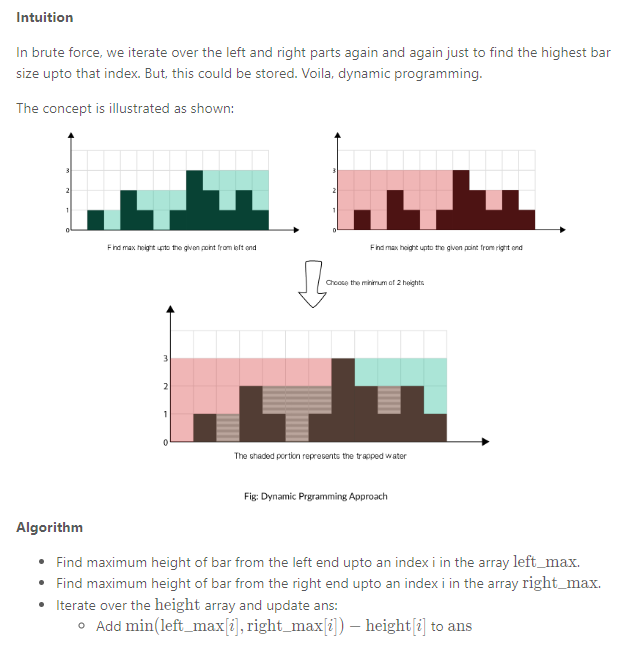

In [ ]:
# Approach 3: Using stacks   c++
int trap(vector<int>& height)
{
    int ans = 0, current = 0;
    stack<int> st;
    while (current < height.size()) {
        while (!st.empty() && height[current] > height[st.top()]) {
            int top = st.top();
            st.pop();
            if (st.empty())
                break;
            int distance = current - st.top() - 1;
            int bounded_height = min(height[current], height[st.top()]) - height[top];
            ans += distance * bounded_height;
        }
        st.push(current++);
    }
    return ans;
}